In [1]:
from sklearn import datasets
import pandas as pd
from foundry.foundry import Foundry
import numpy as np
import matplotlib.pyplot as plt

In [2]:
f = Foundry().from_file()
X, y = f.get_data()

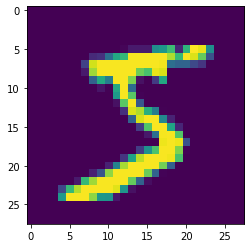

In [3]:
plt.imshow(X.iloc[0][0])

In [6]:
from collections import namedtuple
Point = namedtuple('Point', ['x', 'y'])
p = Point(11, y=22)

In [4]:
df = f.dataframe



In [6]:
df['*ref'][0]

'./data/mnist-0.npy'

In [25]:
keys = []
test = ""
reference_char = "*"
rows = []
data = {}
for key in df.keys():
    if key[0] == reference_char:
        keys.append(key)
        for ref in df[key]:
            rows.append(np.load(ref))
        data[key] = np.array(rows)

In [28]:
data

{'*ref': array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0

In [12]:
np_arr = np.array(rows)

In [40]:
arr_merged = np.append([[1, 2], [3, 4]], [[10, 20], [30, 40]], axis=0)


In [41]:
arr_merged

array([[ 1,  2],
       [ 3,  4],
       [10, 20],
       [30, 40]])

In [14]:
def dereference_columns(dataframe, reference_char="*"):
    keys = []
    for key in dataframe.keys():
        if key[0] == reference_char:
            keys.append(key)
            dataframe[key] = dataframe[key].map(lambda x: np.load(x))
    t = namedtuple(*keys)

# Run this to generate data
In the future, this can be populated from an MDF search and download routine

In [43]:
# import numpy as np
# import os
# from keras.datasets import mnist

# (x_train, y_train), (x_test, y_test) = mnist.load_data()

# n_files = 50
# references = []
# for i, data in enumerate(x_train[0:n_files]):
#     filename = "./data/mnist-{}.npy".format(i)
#     f = open(filename, 'wb')
#     np.save(f,data)
#     references.append(filename)

# df = pd.DataFrame({"Y":list(y_train[0:n_files]), "references":references}, columns=["Y", "*ref"])
# df = pd.concat([pd.DataFrame(references, columns=["*ref"]), pd.DataFrame(y_train[0:n_files], columns=["Y"])], axis=1)
# df.to_json("foundry_dataframe.json")
    
    

# mnist_dict = {
#     "dc":{},
#     "mdf":{},
#     "foundry":{
#         "inputs":['*ref'],
#         "outputs":['Y'],
#         "type":"file"
#     }
# }

# f = Foundry().from_dict(mnist_dict)
# f.to_file()